### Filtering & Sorting with Pokemon Data Using Pandas

<img src="pokemon.jpg" alt="Alt Text" width="auto" height="300">



In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [5]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Distribution of Pokemon Types:

<Axes: ylabel='count'>

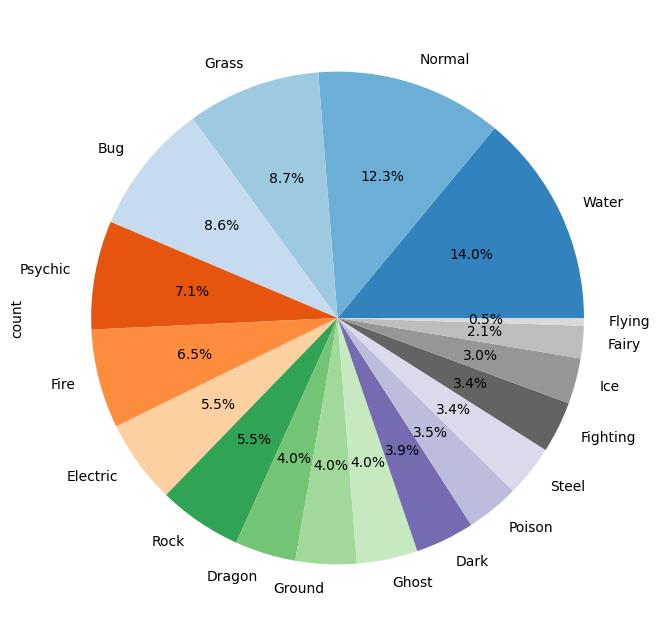

In [7]:
df['Type 1'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='tab20c', figsize=(10, 8))

#### Distribution of Legendary Pokemons:

<Axes: ylabel='count'>

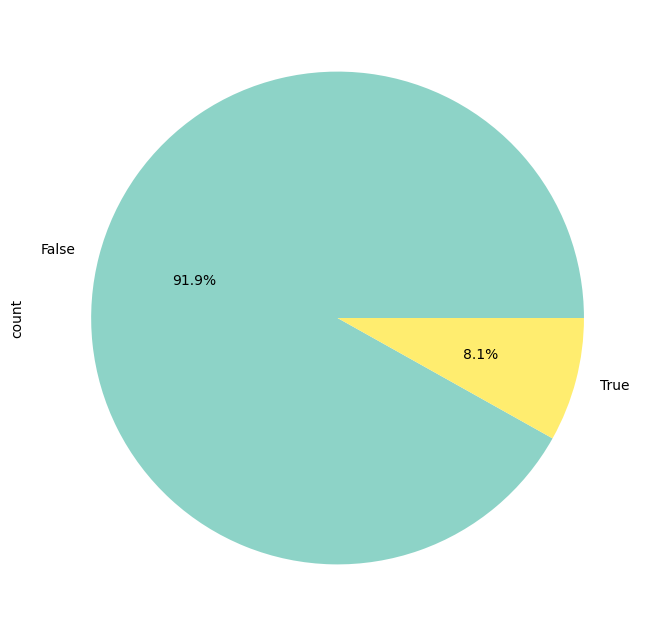

In [9]:
df['Legendary'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='Set3', figsize=(10, 8))

### Basic filtering

##### 1. How many Pokemons exist with an `Attack` value greater than 150?

Doing a little bit of visual exploration, we can have a sense of the most "powerful" pokemons (defined by their "Attack" feature). A boxplot is a great way to visualize this:

<Axes: xlabel='Attack'>

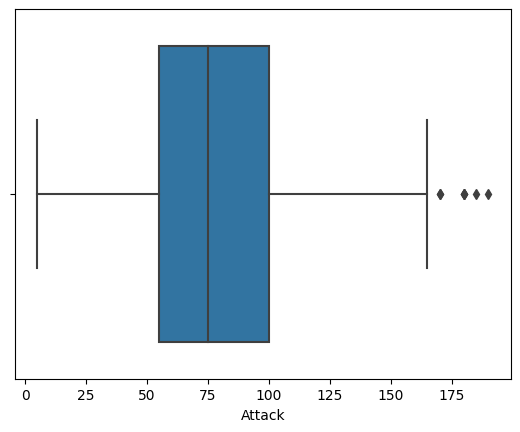

In [11]:
sns.boxplot(data=df, x='Attack')

In [12]:
df.loc[df['Attack'] > 150]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
137,138,Mega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False
141,142,Mega Gyarados,Water,Dark,95,155,109,70,130,81,1,False
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
232,233,Mega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
268,269,Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False
279,280,Mega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False
313,314,Slaking,Normal,NaN,150,160,100,95,65,100,3,False
387,388,Mega Banette,Ghost,NaN,64,165,75,93,83,75,3,False
424,425,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True


##### 2. Select all pokemons with a Speed of `10` or less

<Axes: xlabel='Speed'>

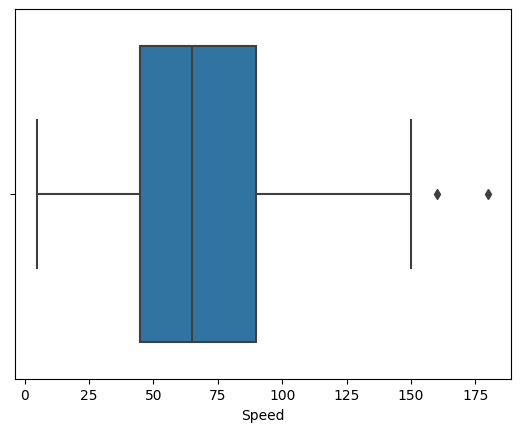

In [13]:
sns.boxplot(data=df, x='Speed')

In [14]:
slow_pokemons_df = df.loc[df['Speed'] <= 10]

##### 3. How many Pokemons have a `Sp. Def` value of 25 or less?

In [15]:
df.query("`Sp. Def` <= 25").shape

(18, 12)

##### 4. Select all the Legendary pokemons

In [16]:
legendary_df = df.loc[df['Legendary']]

##### 5. Find the outlier

Find the pokemon that is clearly an outlier in terms of Attack / Defense:

Text(150, 10, "Who's this guy?")

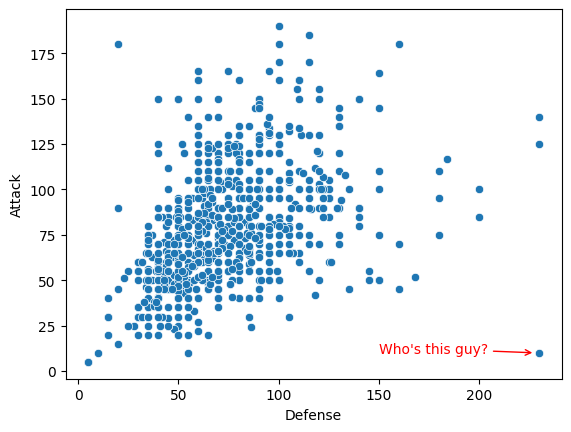

In [17]:
ax = sns.scatterplot(data=df, x="Defense", y="Attack")
ax.annotate(
    "Who's this guy?", xy=(228, 10), xytext=(150, 10), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [18]:
df.query("Attack < 20" and "Defense>220")

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


### Advanced selection

Now let's use boolean operators to create more advanced expressions

##### 6. How many Fire-Flying Pokemons are there?

In [19]:
df.loc[df['Type 1'] == 'Fire', 'Type 2'].value_counts()

Type 2
Fighting    7
Flying      6
Ground      3
Psychic     2
Normal      2
Dragon      1
Rock        1
Steel       1
Water       1
Name: count, dtype: int64

##### 7. How many 'Poison' pokemons are across both types?

In [20]:
>>> df.loc[(df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')].shape

(62, 12)

##### 8. Name the pokemon of `Type 1` *Ice* which has the strongest defense?

In [21]:
df.loc[df['Type 1'] == 'Ice'].sort_values(by='Defense', ascending=False).head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False
522,523,Glaceon,Ice,NaN,65,60,110,130,95,65,4,False
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,1,True
415,416,Regice,Ice,NaN,80,50,100,100,200,50,3,True
400,401,Walrein,Ice,Water,110,80,90,95,90,65,3,False


##### 9. What's the most common type of Legendary Pokemons?

In [22]:
df2=df.loc[df['Legendary']==True]
df2['Type 1'].mode()

0    Psychic
Name: Type 1, dtype: object

##### 12. Select most powerful Fire-type pokemons

In [24]:
powerful_fire_df = df.loc[
    (df['Type 1'] == 'Fire') &
    (df['Attack'] > 100)
]

##### 13. Select all Water-type, Flying-type pokemons

In [25]:
water_flying_df = df.query("`Type 1` == 'Water' and `Type 2` == 'Flying'")

##### 14. Select specific columns of Legendary pokemons of type Fire

In [26]:
legendary_fire_df = df.loc[
    df['Legendary'] & (df['Type 1'] == 'Fire'),  # Condition (or index-level)
    ['Name', 'Attack', 'Generation']             # Columns
]

##### 15. Select Slow and Fast pokemons

This is the distribution of speed of the pokemons. The red lines indicate those bottom 5% and top 5% pokemons by speed:

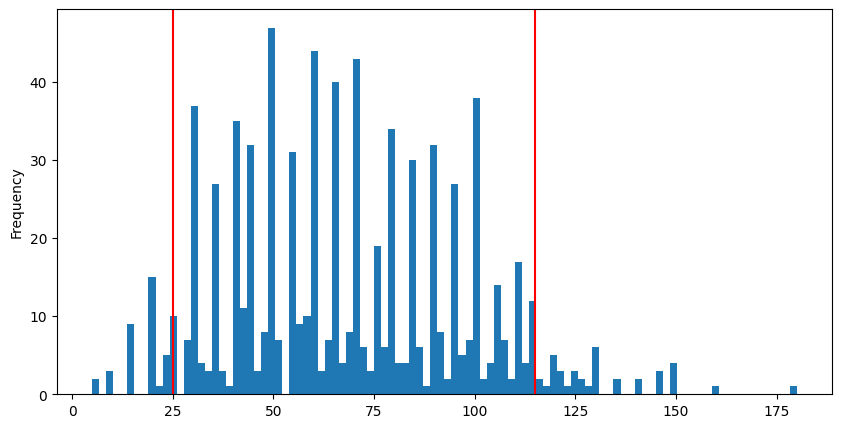

In [27]:
ax = df['Speed'].plot(kind='hist', figsize=(10, 5), bins=100)
ax.axvline(df['Speed'].quantile(.05), color='red')
ax.axvline(df['Speed'].quantile(.95), color='red')

In [28]:
slow_fast_df = df.loc[
    (df['Speed'] < df['Speed'].quantile(.05)) |
    (df['Speed'] > df['Speed'].quantile(.95))
]


##### 16. Find the Ultra Powerful Legendary Pokemon

Text(160, 150, "Who's this guy?")

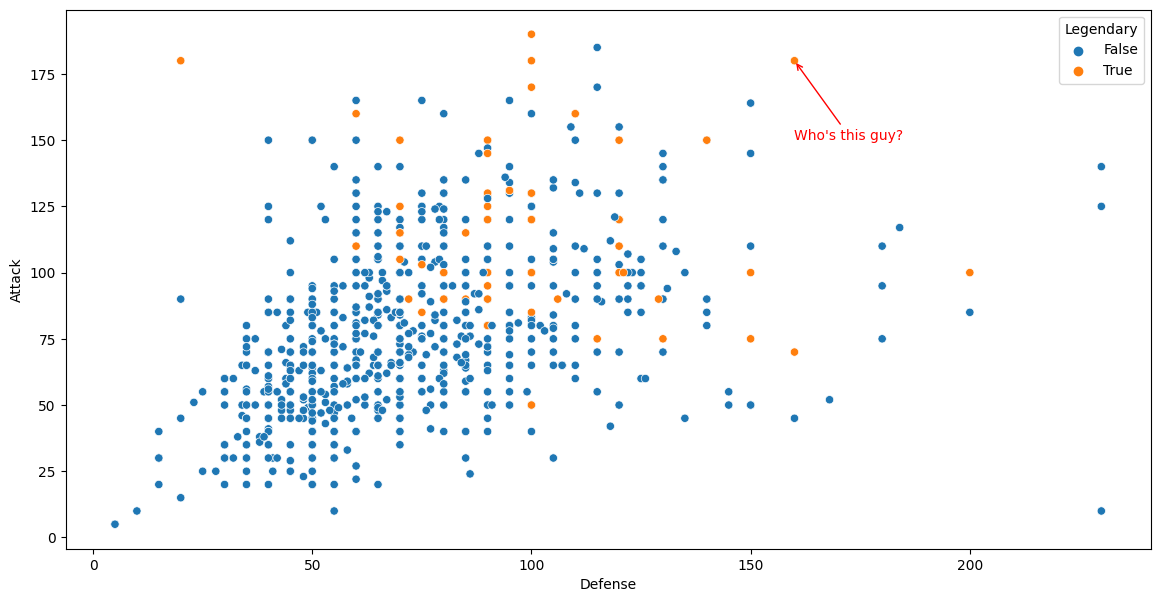

In [32]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.scatterplot(data=df, x="Defense", y="Attack", hue='Legendary', ax=ax)
ax.annotate(
    "Who's this guy?", xy=(160, 180), xytext=(160, 150), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [35]:
df.loc[
    df['Legendary'] &
    (df['Attack'] > 175)
, ['Name', 'Attack', 'Defense']].sort_values(by=['Defense'], ascending=False)


,Name,Attack,Defense
424,Primal Groudon,180,160
163,Mega Mewtwo X,190,100
426,Mega Rayquaza,180,100
429,DeoxysAttack Forme,180,20


### The End!